# Integración numérica usando Monte Carlo

El método Monte Carlo puede ser útil como método numérico para estimar integrales (áreas). De hecho, con el uso del algoritmo Monte Carlo, es posible adoptar un procedimiento numérico para dar solución a algunos problemas matemáticos. La eficiencia de las soluciones numéricas crece en comparación a otros métodos cuando el tamaño del problema crece.

**Nota importante:** Analizaremos el problema de la integral definida. En casos <<sencillos>>, hay métodos para realizar la integración tales como la integración por partes, integración por sustitución (cambio de variable), y demás. En casos más complejos, es necesario adoptar procedimientos numéricos que requieren el uso de una computadora. En estos casos, la simulación Monte Carlo provee una solución simple que es particularmente útil en casos de integrales multidimensionales.
    
Sin embargo, es importante resaltar que el resultado de la simulación provee una aproximación de la integral y no su valor exacto.
    
## Definición del problema:
En la siguiente ecuación, definimos con $I$ la integral definida de la función $f$ en el intervalo $[a,b]:$
$$I = \int_{a}^{b} f(x) dx$$
En el intervalo $[a,b]$, identificamos en máximo de la función $f$ y lo llamamos $U$. Para evaluar la aproximación, dibujamos un rectángulo con base en $[a,b]$ y altura $U$. El siguiente diagrama muestra el área debajo de la función $f$ - la cuál representa la integral de $f(x)$- y el área $A$ del rectángulo  cuya base es $[a,b]$ y la altura es $U$
    
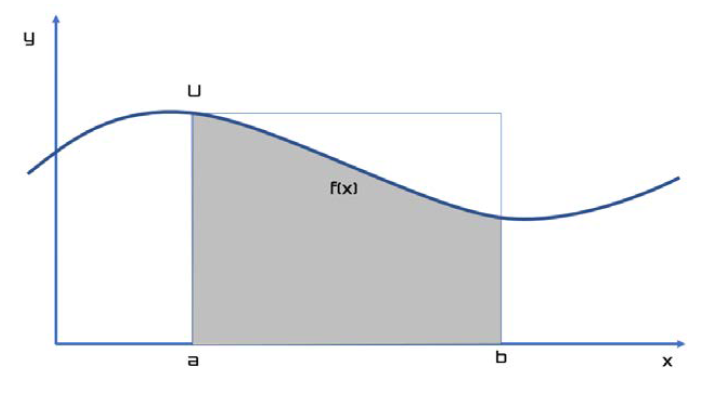

Analizando el diagrama previo, podemos identificar los siguientes intervalos:
<ul>
    <li> $x \in [a,b]$ </li>
    <li> $y \in [0,U]$ </li>
</ul>
En la simulación Monte Carlo, $x$ y $y$ representan números aleatorios. En este punto, podemos considerar un punto en el plano cartesiano, $(x,y)$. Nuestra meta es determinar la probabilidad de que este punto caiga en el área resaltada en el diagrama anterior; esto es, que $y \leq f(x)$. Podemos definir dos áreas:
<ul>
    <li> El área por debajo de la función $f$, que coincide con la integral definida $I$. </li>
    <li> El área $A$ del rectángulo que tiene base $[a,b]$ y altura $U$. </li>
</ul>  
La relación entre la probabilidad en cuestión y las dos áreas es:
$$P(y \leq f(x)) = \frac{I}{A} = \frac{I}{(b-a)*U}$$
Es posible estimar la probabilidad, $P(y \leq f(x))$, usando simulación Monte Carlo. De hecho, cuando se estimó Pi se usó un método similar. 
    
Para hacer la estimación, consideramos $N$ pares de puntos aleatorios $(x_i, y_i)$ generados como sigue:
<ul>
    <li> $x_i \in [a,b]$ </li>
    <li> $y_i \in [0,U]$ </li>
</ul>
Generar números aleatorios en los intervalos considerados determinará que algunos puntos cumplan con la condisión $y_i \leq f(x_i)$. Si contamos la cantidad de puntos que cumplen dicha condición y la llamamos $M$ podemos analizar su variación. Esto nos dará una aproximación, cuya precisión crece tanto como el número de pares aleatorios $(x_i, y_i)$ generados crece. La aproximación del cálculo de la probabilidad $P(y\leq f(x))$ es igual al siguiente valor:
$$\mu = \frac{M}{N}$$
Con esto, tenemos que:
$$P(y \leq f(x)) = \frac{I}{A} = \frac{I}{(b-a)*U} \to I \approx \mu*(b-a)*U = \frac{M}{N} * A$$
Esto es la representación matemática del problema. Veamos la solución numérica.

## Ejercicio:
Se sabe que la función $f(x) = e^{-x^2}$ no tiene primitiva, es decir no existe una función $F(x)$, tal que
$$F(x) = \int e^{-x^2} dx$$
Use el método de Monte Carlo, para aproximar la integral
$$\int_{1}^{3} e^{-x^2} dx$$
Divida el intervalo en 1000000 de pasos (NumSteps) y en el método de Monte Carlo genere 1000000 de puntos (N).

Realice una representación visual de la función, y de los puntos generados con el método. 

In [36]:
# Paquetes necesarios
import random
import numpy as np
import matplotlib.pyplot as plt

# Fijamos una semilla, para obtener el mismo resultado
random.seed(2)

# Definimos una función anónima
f = lambda x: np.exp(-x**2)

#Definimos los parámetros
a = 1.0
b = 3.0
NumSteps = 1000000

# Definimos los elementos donde guardaremos los datos
XIntegral=[]
YIntegral=[]
XRectangle=[]
YRectangle=[]

# Con esto definimos el mínimo y el máximo de una distribución
ymin = f(a)
ymax = ymin
for i in range(NumSteps):
    x = a + (b - a) * i / NumSteps
    y = f(x)
    if y < ymin: ymin = y
    if y > ymax: ymax = y
        
# Simulación de Monte Carlo
A = (b - a) * (ymax - ymin)
N = 1000000
M = 0
for k in range(N):
    x = a + (b - a) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if y <= f(x):
        M += 1
        XIntegral.append(x)
        YIntegral.append(y)
    else:
        XRectangle.append(x)
        YRectangle.append(y)
NumericalIntegral = M / N * A
print ('Integración numérica = ' + str(NumericalIntegral))

Integración numérica = 0.1388404049871433


## Representación visual

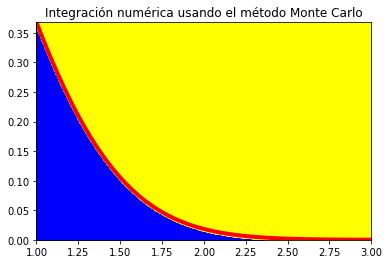

In [37]:
XLin = np.linspace(a,b)
YLin = []
for x in XLin:
    YLin.append(f(x))
plt.axis ([a, b, 0, ymax])
plt.plot (XLin,YLin, color='red' , linewidth='4')
plt.scatter(XIntegral, YIntegral, color='blue', marker
='.')
plt.scatter(XRectangle, YRectangle, color='yellow',
marker ='.')
plt.title ('Integración numérica usando el método Monte Carlo')
plt.show()

Se puede ver que los puntos en azul están posicionados debajo de la curva de la función (curva en rojo), mientras que todos los puntos amarillos están por encima de la misma.

KstestResult(statistic=0.952, pvalue=0.0)

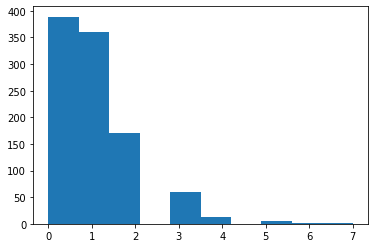

In [64]:
def poisson_simul(rate, T):
    time = np.random.poisson(rate)
    times = 0
    A = []
    while (times < T):
        times = times+1
        time = np.random.poisson(rate)
        A.append(time)
    return A

import random
from scipy import stats

times = poisson_simul(1, 1000)
plt.hist(times)

stats.kstest(times, stats.uniform(loc=0.0, scale=100.0).cdf)